In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
location_data = {
    "NCAR Mesa Lab": (39.987, -105.264),
    "Flatirons": (39.977, -105.283),
    "Pearl Street Mall": (40.018, -105.278),
    "Chautauqua Park": (39.999, -105.281),
    "Boulder Reservoir": (40.070, -105.227),
    "Flagstaff Mountain": (40.003, -105.297),
}

locations = list(location_data.keys())
latitudes = np.array([loc[0] for loc in location_data.values()])
longitudes = np.array([loc[1] for loc in location_data.values()])

ds = xr.Dataset(
    {
        "latitude": (["location"], latitudes, {"units": "degrees_north"}),
        "longitude": (["location"], longitudes, {"units": "degrees_east"}),
        "location_name": (["location"], locations, {"comment": "One of these locations holds the key. But which one?"}),
    },
    coords={"location": locations},
    attrs={
        "title": "The Mystery of Boreas the Penguin",
        "institution": "NCAR - National Center for Atmospheric Research",
        "history": "Created for the NSF SOARS interns",
        "note": "Look deeper… the secrets are within.",
        "next": "One of the locations contains more than just coordinates…"
    }
)

filename = "boreas_mystery.nc"
ds.to_netcdf(filename)

In [4]:
ds

<xarray.Dataset>
Dimensions:        (location: 6)
Coordinates:
  * location       (location) <U18 'NCAR Mesa Lab' ... 'Flagstaff Mountain'
Data variables:
    latitude       (location) float64 39.99 39.98 40.02 40.0 40.07 40.0
    longitude      (location) float64 -105.3 -105.3 -105.3 -105.3 -105.2 -105.3
    location_name  (location) <U18 'NCAR Mesa Lab' ... 'Flagstaff Mountain'
Attributes:
    title:        The Mystery of Boreas the Penguin
    institution:  NCAR - National Center for Atmospheric Research
    history:      Created for the NSF SOARS interns
    note:         Look deeper… the secrets are within.
    next:         One of the locations contains more than just coordinates…

In [4]:
# Your location data
location_data = {
    "NCAR Mesa Lab": (39.987, -105.264),
    "Flatirons": (39.977, -105.283),
    "Pearl Street Mall": (40.018, -105.278),
    "Chautauqua Park": (39.999, -105.281),
    "Boulder Reservoir": (40.070, -105.227),
    "Flagstaff Mountain": (40.003, -105.297),
}

locations = list(location_data.keys())
latitudes = np.array([loc[0] for loc in location_data.values()])
longitudes = np.array([loc[1] for loc in location_data.values()])

# Create an xarray Dataset
ds = xr.Dataset(
    {
        "latitude": (["location"], latitudes, {"units": "degrees_north"}),
        "longitude": (["location"], longitudes, {"units": "degrees_east"}),
        "location_name": (["location"], locations, {"comment": "Names of the locations"}),
    },
    coords={"location": locations},
    attrs={
        "title": "The Mystery of Boreas the Penguin",
        "institution": "NCAR - National Center for Atmospheric Research",
        "history": "Created for the NSF SOARS interns",
        "comment": "The wind whispers secrets. Seek Boreas where science meets the sky.",
    }
)

Text(0.5, 1.0, 'Locations: The Mystery of Boreas the Penguin')

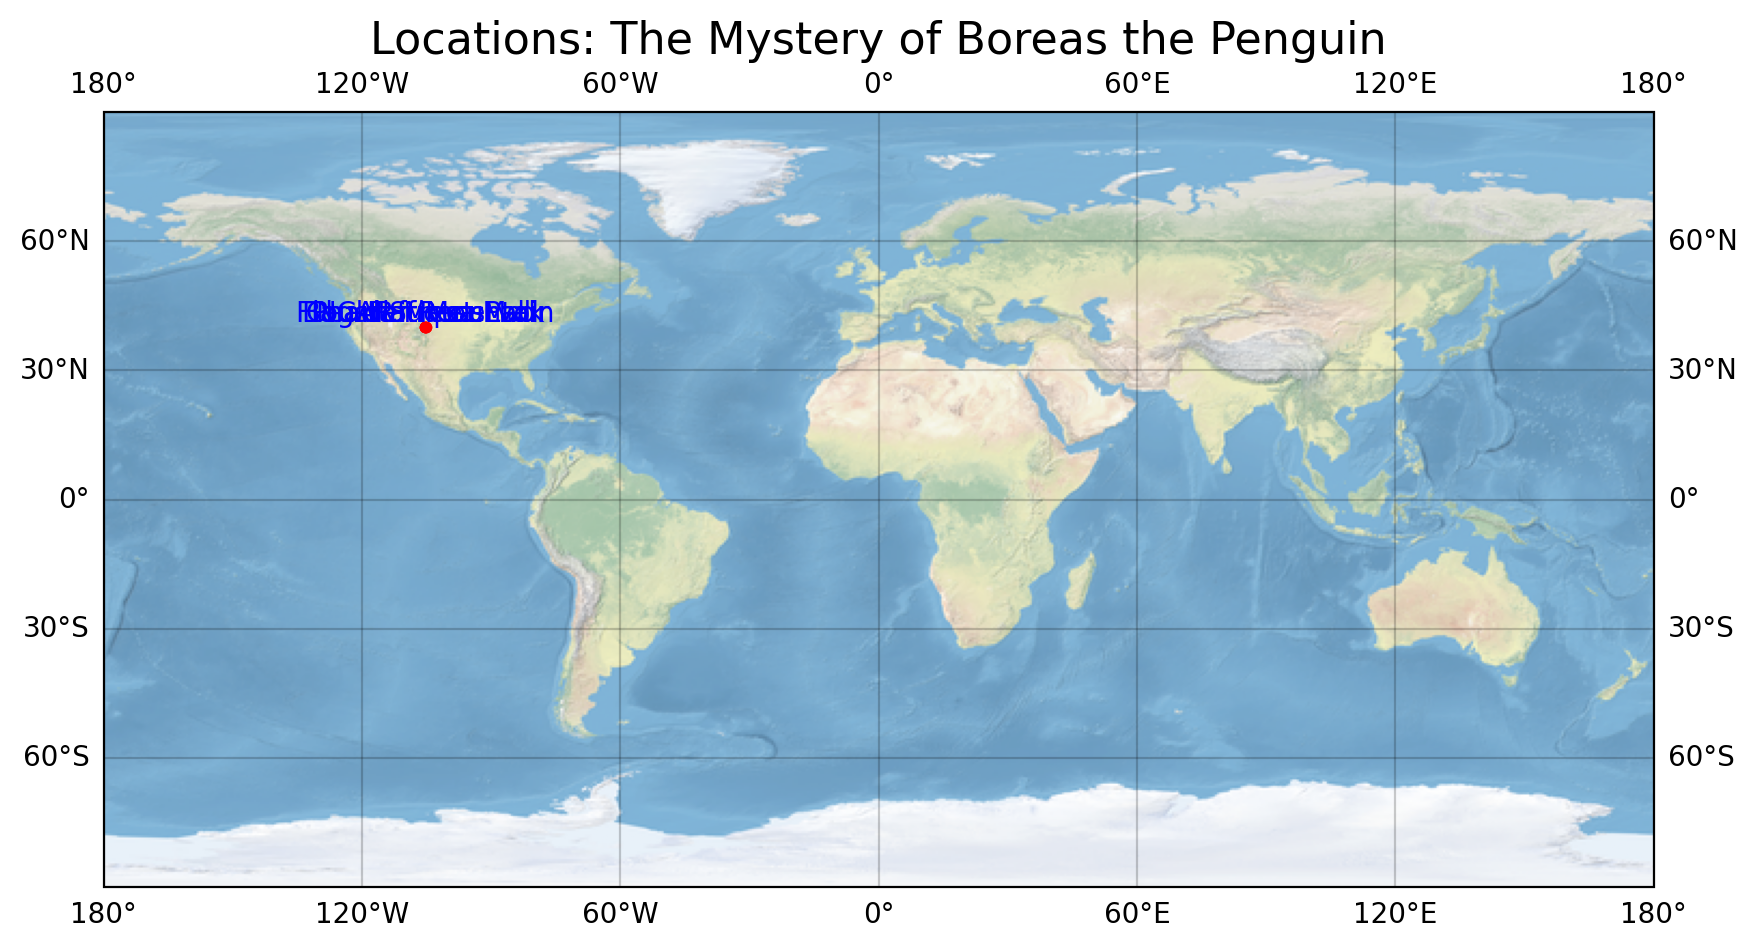

In [5]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=200, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.gridlines(draw_labels=True, alpha=0.2, color='black')
ax.stock_img()

ax.scatter(ds.longitude.values, ds.latitude.values, color='red', s=10, edgecolor=None, transform=ccrs.PlateCarree())

for i, location in enumerate(ds.location_name.values):
    ax.text(ds.longitude.values[i], ds.latitude.values[i], location, color='blue', transform=ccrs.PlateCarree(), ha='center', va='bottom')

plt.title("Locations: The Mystery of Boreas the Penguin", fontsize=16)

Text(0.5, 1.0, 'Locations: The Mystery of Boreas the Penguin')

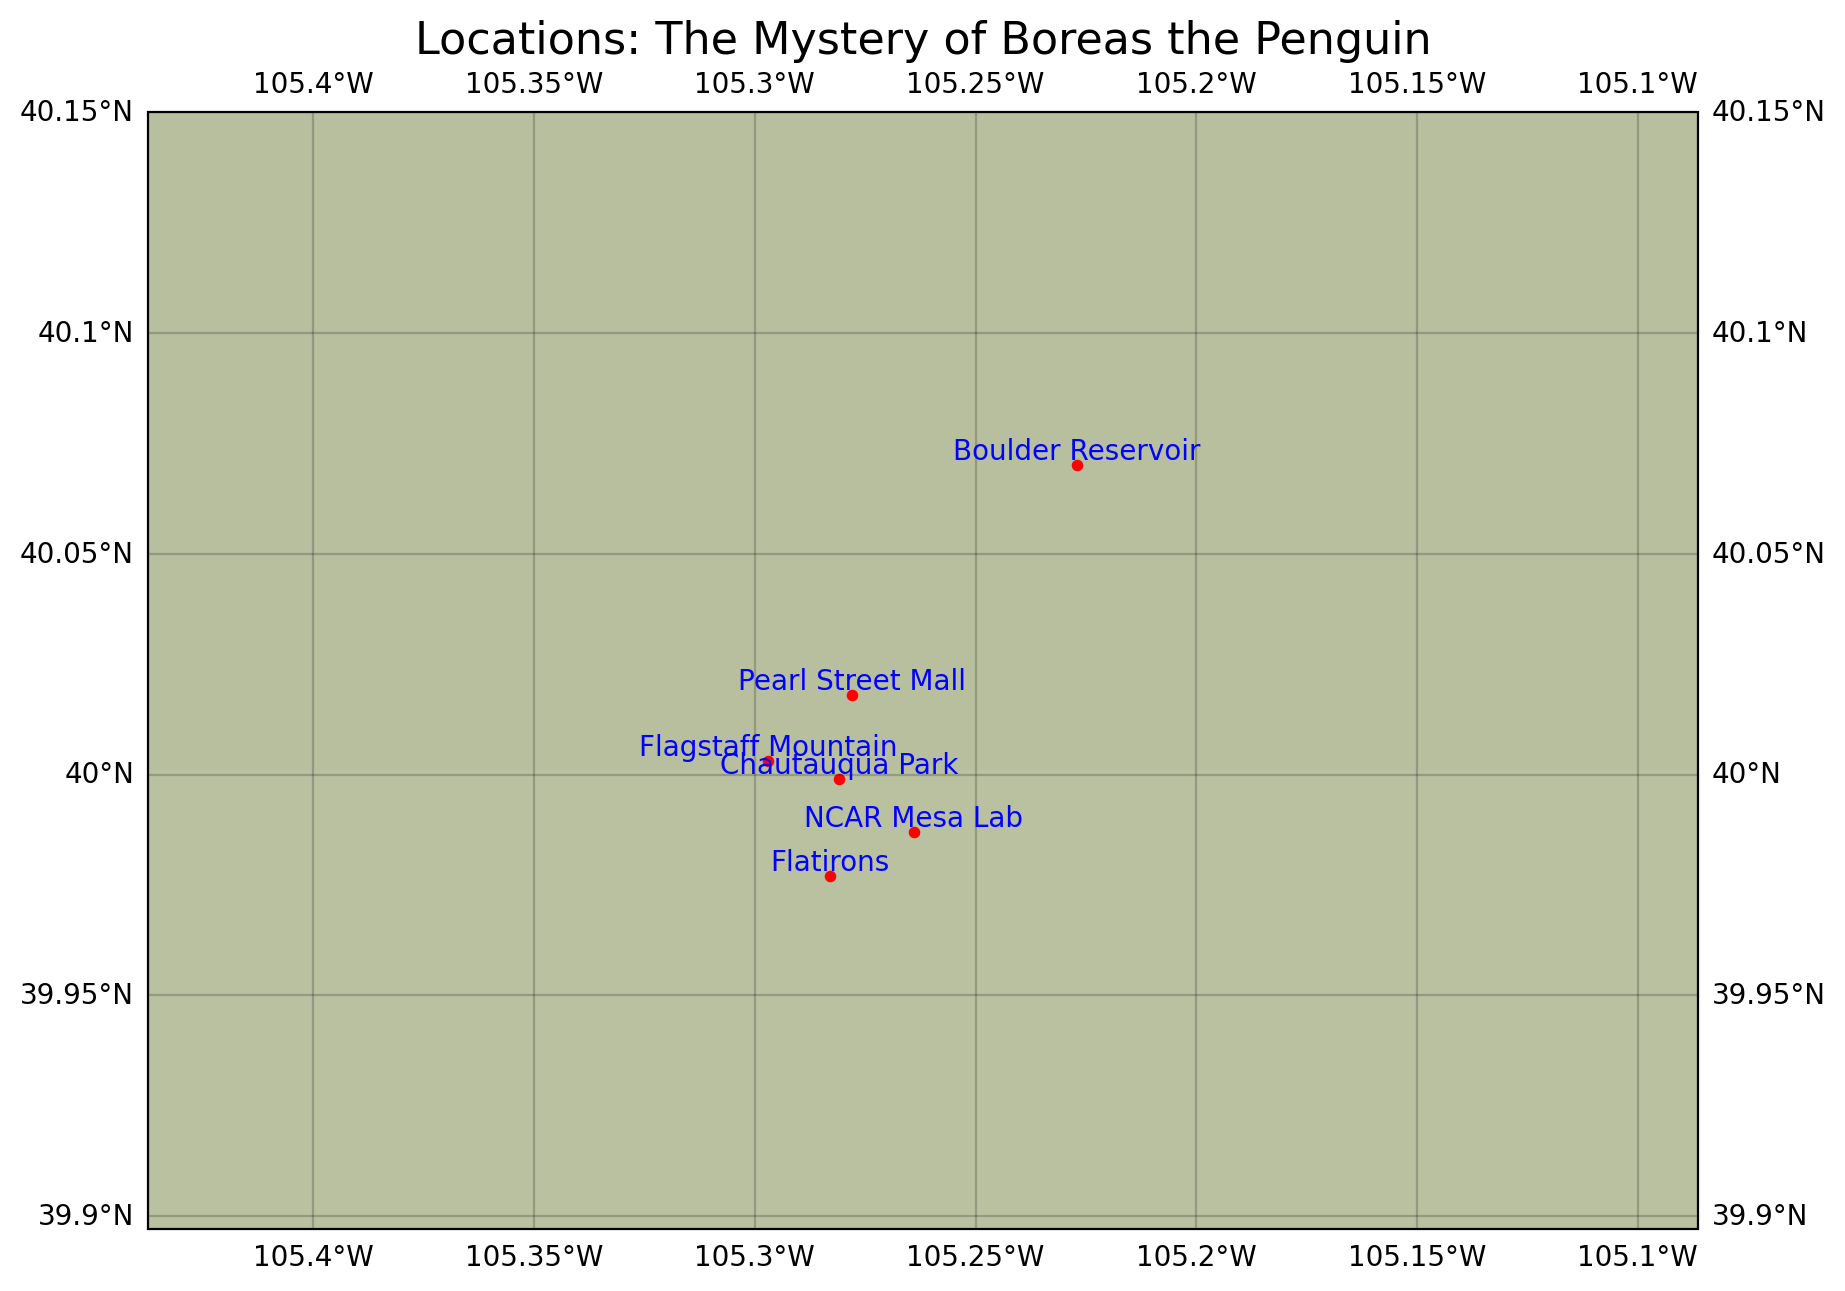

In [6]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=200, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.gridlines(draw_labels=True, alpha=0.2, color='black')
ax.stock_img()

xbuf = .002
ybuf = .002

minlat = ds.latitude.min().item() * (1-ybuf)
maxlat = ds.latitude.max().item() * (1+ybuf)
minlon = ds.longitude.min().item() * (1-xbuf)
maxlon = ds.longitude.max().item() * (1+xbuf)

ax.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())

ax.scatter(ds.longitude.values, ds.latitude.values, color='red', s=10, edgecolor=None, transform=ccrs.PlateCarree())

for i, location in enumerate(ds.location_name.values):
    ax.text(ds.longitude.values[i], ds.latitude.values[i], location, color='blue', transform=ccrs.PlateCarree(), ha='center', va='bottom')

plt.title("Locations: The Mystery of Boreas the Penguin", fontsize=16)

Text(0.5, 1.0, 'Locations: The Mystery of Boreas the Penguin')

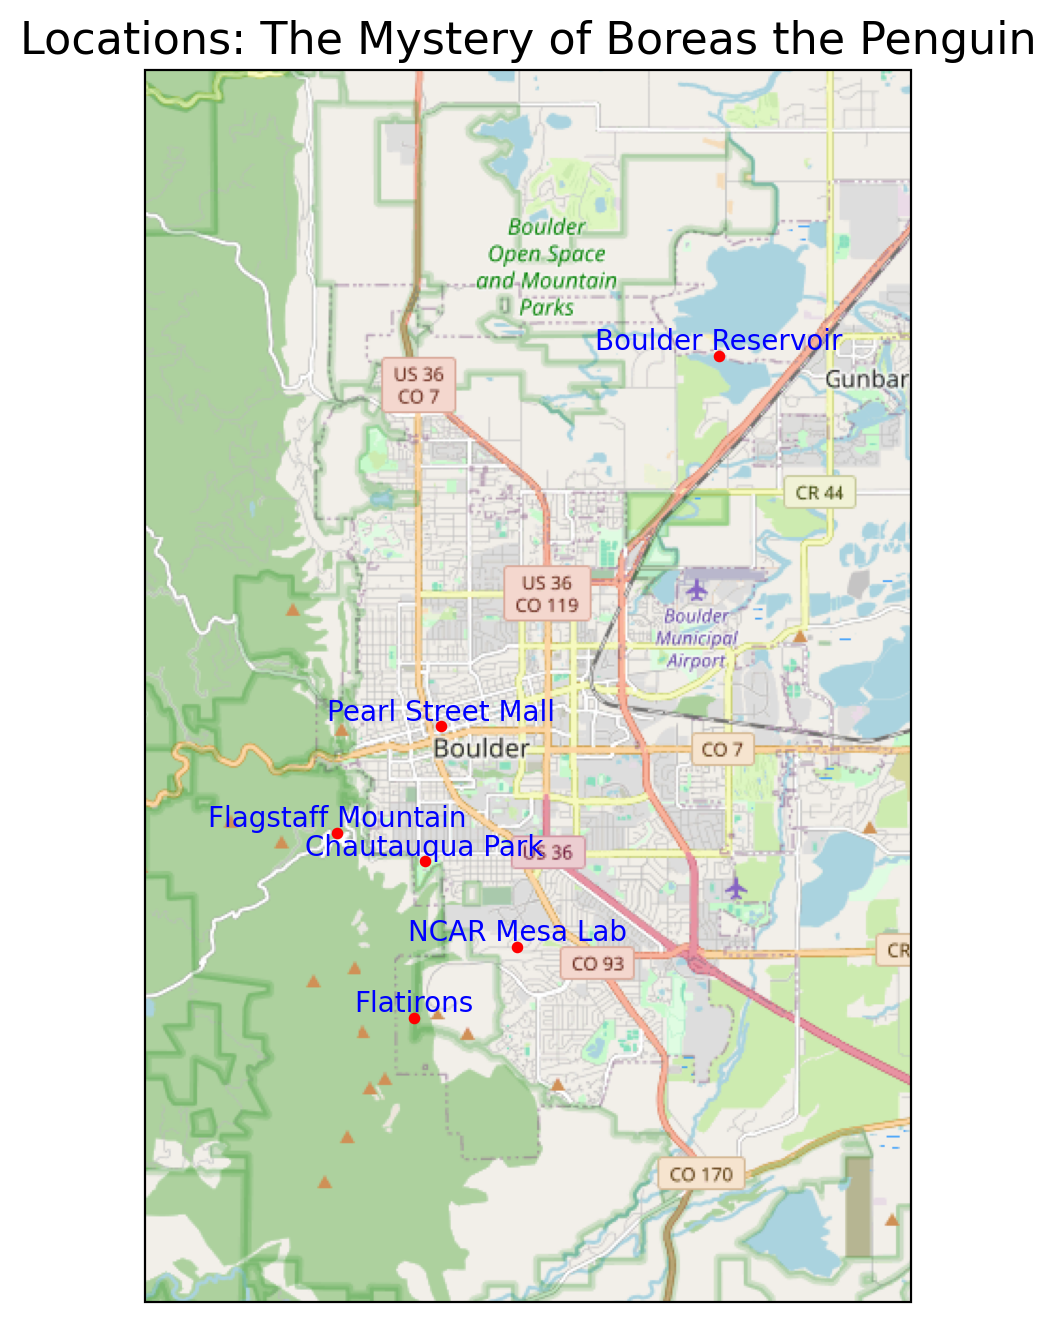

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

tiler = cimgt.OSM() 
mercator = tiler.crs 

fig, ax = plt.subplots(figsize=(10, 8), dpi=200, subplot_kw=dict(projection=mercator))

ax.add_image(tiler, 12)  # 12 is the zoom level; adjust for detail level

xbuf = .001
ybuf = .001

minlat = ds.latitude.min().item() * (1 - ybuf)
maxlat = ds.latitude.max().item() * (1 + ybuf)
minlon = ds.longitude.min().item() * (1 - xbuf)
maxlon = ds.longitude.max().item() * (1 + xbuf)

ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())

ax.scatter(ds.longitude.values, ds.latitude.values, color='red', s=10, edgecolor=None, transform=ccrs.PlateCarree())

for i, location in enumerate(ds.location_name.values):
    ax.text(ds.longitude.values[i], ds.latitude.values[i], location, color='blue', transform=ccrs.PlateCarree(), ha='center', va='bottom')

plt.title("Locations: The Mystery of Boreas the Penguin", fontsize=16)